AGE AND GENDER PREDICTION

IMPORTING NECESSARY LIBRARIES

In [1]:
import os
import matplotlib.pyplot as plt
from PIL import Image
import pandas as pd
import seaborn as sns
import random

PRE PROCESSING

In [2]:
dataset_path = r"C:\Projects\Age and Gender Prediction\UTKFace_copy"

In [3]:
# Firstly, our dataset has .chip extension at the end which we want to get rid of


for filename in os.listdir(dataset_path):
    if ".chip" in filename:
        old_filepath = os.path.join(dataset_path, filename)
        new_filename = filename.replace(".", "")
        new_filepath = os.path.join(dataset_path, new_filename)
        os.rename(old_filepath, new_filepath)
        print(f"Renamed {old_filepath} to {new_filepath}")


In [4]:
# Then we got ".jpg.jpg" as extensions, remove one .jpg

for filename in os.listdir(dataset_path):
    new_filename = filename.replace(".jpg.jpg", ".jpg")
    if new_filename != filename:
        old_filepath = os.path.join(dataset_path, filename)
        new_filepath = os.path.join(dataset_path, new_filename)
        os.rename(old_filepath, new_filepath)
        print(f"Renamed {old_filepath} to {new_filepath}")

In [5]:
# Corrected filenames

filenames = os.listdir(dataset_path)
print(filenames[0])

100_0_0_20170112213500903.jpg


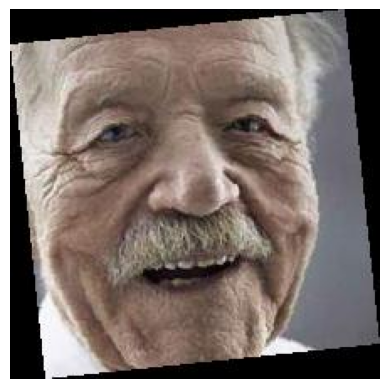

In [7]:
# Taking a look at our image

image_path = os.path.join(dataset_path, filenames[3])
image = Image.open(image_path)

plt.imshow(image)
plt.axis("off")
plt.show()

In [8]:
from PIL import Image
import os
import random

# List all image files in the directory
image_files = os.listdir(dataset_path)

# Define a function to perform augmentation
def augment_image(image_path, save_directory, image_index):
    image = Image.open(image_path)
    
    # 1st augmentation: Horizontal Flip
    augmented_image_1 = image.transpose(Image.FLIP_LEFT_RIGHT)
    
    # 2nd augmentation: Vertical Flip
    augmented_image_2 = image.transpose(Image.FLIP_TOP_BOTTOM)
    
    # 3rd augmentation: Random Rotation within ±20 degrees
    rotation_angle = random.randint(-20, 20)
    augmented_image_3 = image.rotate(rotation_angle, expand=True)
    
    # Save augmented images with the desired filenames
    augmented_filenames = [
        f"{os.path.splitext(os.path.basename(image_path))[0]}_{i + 1}{os.path.splitext(image_path)[-1]}"
        for i in range(3)
    ]
    
    augmented_images = [augmented_image_1, augmented_image_2, augmented_image_3]
    
    for augmented_image, augmented_filename in zip(augmented_images, augmented_filenames):
        augmented_path = os.path.join(save_directory, augmented_filename)
        augmented_image.save(augmented_path)

# Create a directory to save augmented images
augmented_directory = "C:/Projects/Age and Gender Prediction/UTKFace_copy"
os.makedirs(augmented_directory, exist_ok=True)

# Iterate through each image file
for image_index, image_file in enumerate(image_files, start=1):
    # Check if the file is an image (you can customize this condition)
    if image_file.lower().endswith(('.png', '.jpg', '.jpeg')):
        original_image_path = os.path.join(dataset_path, image_file)
        augment_image(original_image_path, augmented_directory, image_index)


In [8]:
# Our files have age and gender information in the filenames, extracting the info
new_dataset_path = r"C:\Projects\Age and Gender Prediction\UTKFace_copy"

gender_list = []
age_list = []
image_paths = []

for filename in os.listdir(new_dataset_path):
    image_path = os.path.join(new_dataset_path, filename)
    temp = filename.split("_")
    gender_list.append(int(temp[1]))
    age_list.append(int(temp[0]))
    image_paths.append(image_path)

In [9]:
df = pd.DataFrame()
df['image'], df['gender_index'], df['age'] = image_paths, gender_list, age_list
df.head()

,image,gender_index,age
0,C:\Projects\Age and Gender Prediction\UTKFace_...,0,100
1,C:\Projects\Age and Gender Prediction\UTKFace_...,0,100
2,C:\Projects\Age and Gender Prediction\UTKFace_...,0,100
3,C:\Projects\Age and Gender Prediction\UTKFace_...,0,100
4,C:\Projects\Age and Gender Prediction\UTKFace_...,0,100


In [10]:
gender_dict = df['gender_index'].replace({0:"Male",1:"Female"})
df["gender"] = df['gender_index'].replace({0:"Male",1:"Female"})

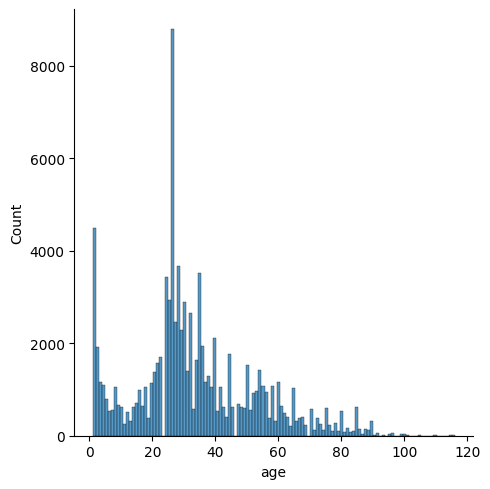

In [11]:
sns.displot(df['age'])

In [12]:
df['age'].max()

116

In [13]:
# Load your DataFrame
# df = pd.read_csv('your_data.csv')

# Define the age group ranges
age_groups = [
    (1, 5), (6, 10), (11, 15), (16, 20), (21, 25), (26, 30),
    (31, 35), (36, 45), (46, 55), (56, 65), (66, 75), (76, 85), (86, 116)
]

# Create a function to assign age groups based on age
def assign_age_group(age):
    for start, end in age_groups:
        if start <= age <= end:
            return f'{start}-{end}'
    return 'Unknown'  # Handle ages that don't fall into any specified range

# Add a new column 'age_group' to the DataFrame
df['age_group'] = df['age'].apply(assign_age_group)

# Now, 'age_group' column in the DataFrame represents the specified age groups (e.g., '1-5')

In [14]:
df.head()

,image,gender_index,age,gender,age_group
0,C:\Projects\Age and Gender Prediction\UTKFace_...,0,100,Male,86-116
1,C:\Projects\Age and Gender Prediction\UTKFace_...,0,100,Male,86-116
2,C:\Projects\Age and Gender Prediction\UTKFace_...,0,100,Male,86-116
3,C:\Projects\Age and Gender Prediction\UTKFace_...,0,100,Male,86-116
4,C:\Projects\Age and Gender Prediction\UTKFace_...,0,100,Male,86-116


In [22]:
# Create a function to assign age group labels based on age
def assign_age_group_label(age):
    for idx, (start, end) in enumerate(age_groups, start=0):
        if start <= age <= end:
            return idx
    return 0  # Use 0 for ages that don't fall into any specified range

# Add a new column 'age_group_labels' to the DataFrame
df['age_group_labels'] = df['age'].apply(assign_age_group_label)

In [23]:
df.head()

,image,gender_index,age,gender,age_group,age_group_labels
0,C:\Projects\Age and Gender Prediction\UTKFace_...,0,100,Male,86-116,12
1,C:\Projects\Age and Gender Prediction\UTKFace_...,0,100,Male,86-116,12
2,C:\Projects\Age and Gender Prediction\UTKFace_...,0,100,Male,86-116,12
3,C:\Projects\Age and Gender Prediction\UTKFace_...,0,100,Male,86-116,12
4,C:\Projects\Age and Gender Prediction\UTKFace_...,0,100,Male,86-116,12


In [25]:
df.to_csv("dataset.csv", index=False)

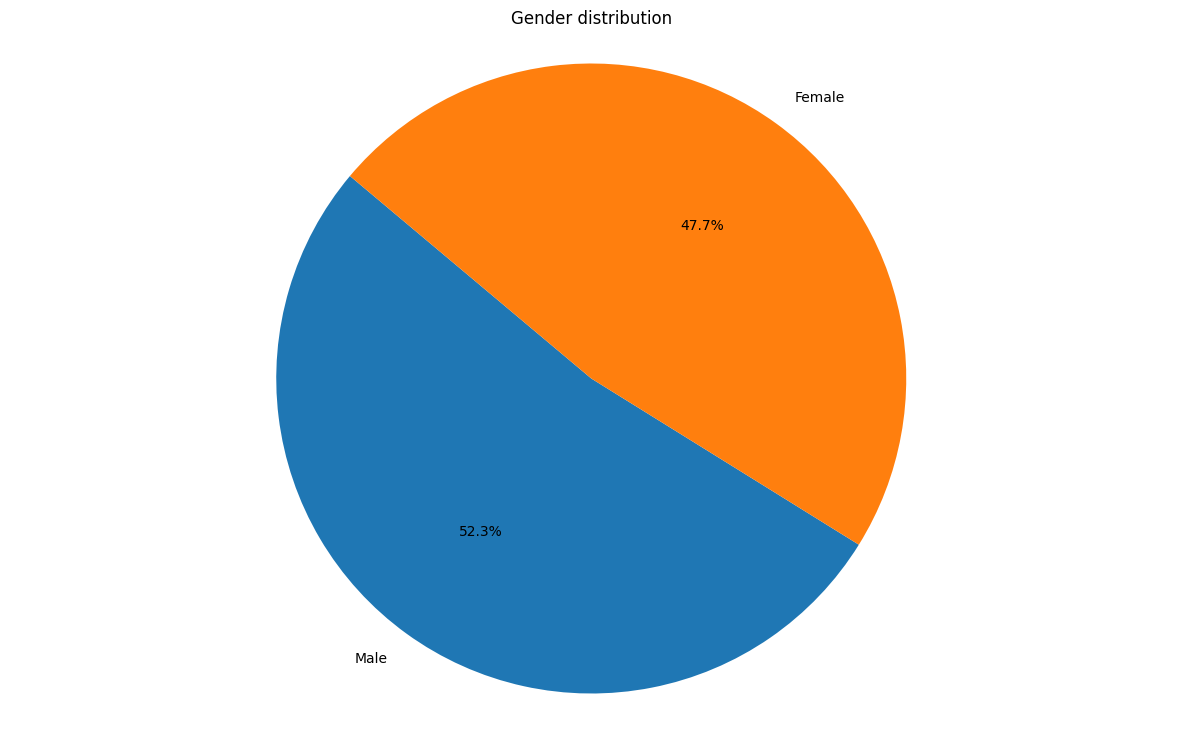

In [18]:
# View gender information

genders = df['gender'].value_counts()

plt.figure(figsize=(15, 9))
plt.pie(genders, labels=genders.index, autopct='%1.1f%%', startangle=140)
plt.title("Gender distribution")
plt.axis("equal")
plt.plot();


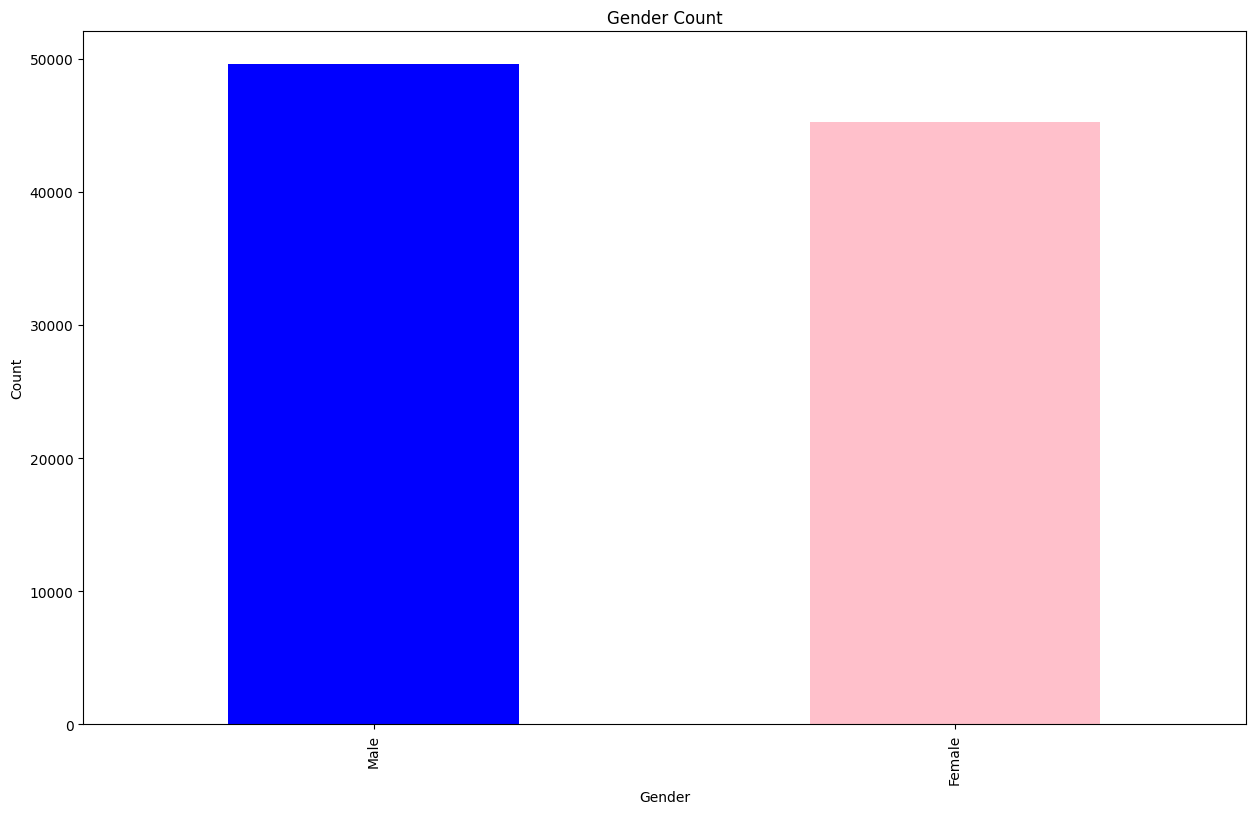

In [19]:
plt.figure(figsize=(15,9))
genders.plot(kind="bar", color=["blue", 'pink'])
plt.title("Gender Count")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.plot();

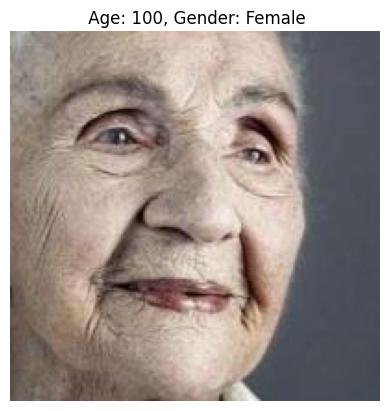

In [20]:
img = Image.open(df['image'][13])
plt.title(f' Age: {df.age[13]}, Gender: {df.gender[15]}')
plt.axis('off')
plt.imshow(img);